# Sales Data Analysis for a Tech Store
##### by Simba Gavi

## Introduction

I completed this project to analyse the sales data of a Tech retail company and simulate the kinds of insights that would be useful to them when they hire a Data Analyst using Python.

I successfully completed the following tasks:

- Data cleaning and pre-processing
- Data Analysis
- Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


## Loading The Data

In [3]:
# loading data

all_data = pd.read_feather(r'/Users/simba/Documents/Data Science Studies/Projects/4..+Sales+Analysis/Sales_data.ftr')

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning the Data
- removing missing values
- removing duplicates


In [5]:
# dropping rows with missing values

all_data = all_data.dropna(how = 'all')

In [6]:
# checking for null values

all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
# dropping duplicated rows

all_data = all_data.drop_duplicates()

In [8]:
# verifying if duplicates have been removed

all_data[all_data.duplicated]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data = pd.DataFrame(all_data)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Data Analysis

- analysing the highest selling month
- analysing the sales by city
- analysing the highest selling product
- finding relationship between sales count and price by product

### Highest selling month

In [10]:
# viewing order date format

all_data['Order Date'][0]

'04/19/19 08:46'

In [11]:
# creating functionn to return month 

def return_month(x):
    return x.split('/')[0]

In [12]:
# creating month column

all_data['Month']= all_data['Order Date'].apply(return_month)

In [13]:
# verifying data types
# notice that all data in the 'object' data type but we need them to be integers and floats

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [67]:
# verifying if column has correct data
all_data['Month'] == 'Order Date'

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Month, Length: 185686, dtype: bool

In [66]:
# creating filter
# removing unwanted data using filter
filter1 = all_data['Month'] == 'Order Date'
all_data = all_data[-filter1]

In [ ]:
# Changing variable types

In [15]:
all_data['Month'] = all_data['Month'].astype(int)


In [16]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [17]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [18]:
# creating a sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [19]:
# previewing column

all_data = pd.DataFrame(all_data)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


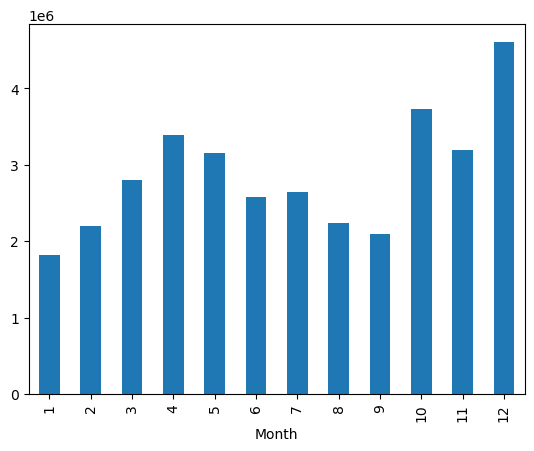

In [20]:
# chart for highest selling month

all_data.groupby(['Month'])['Sales'].sum().plot(kind= 'bar')
plt.show()

#### Conclusion

We can conclude that the highest selling months are October and December. Why? We can explore a variety of reasons, for example, we can look into seasonal sales promotions and holidays in that period that could drive sales revenue.

### Sales by City

In [21]:
# sales by city

# extracting city from column 'Purchase Address'

all_data['Purchase Address'][0].split(',')[1]



' Dallas'

In [22]:
# creating column called 'city'

all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


<Axes: ylabel='count'>

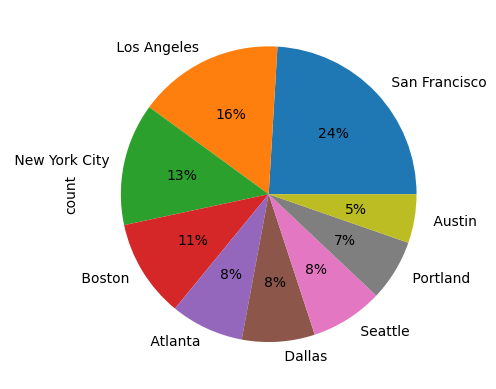

In [68]:
#pie chart showing sales per city

pd.value_counts(all_data['city']).plot(kind = 'pie', autopct = '%1.0f%%')

#### Conclusion

Here we can see that San Fransisco has the highest proportion of sales, accounting for 24% of all sales across their various branches

### Highest Sales Revenue by Product

Text(0.5, 1.0, 'Total Sales by Product')

<Figure size 1000x600 with 0 Axes>

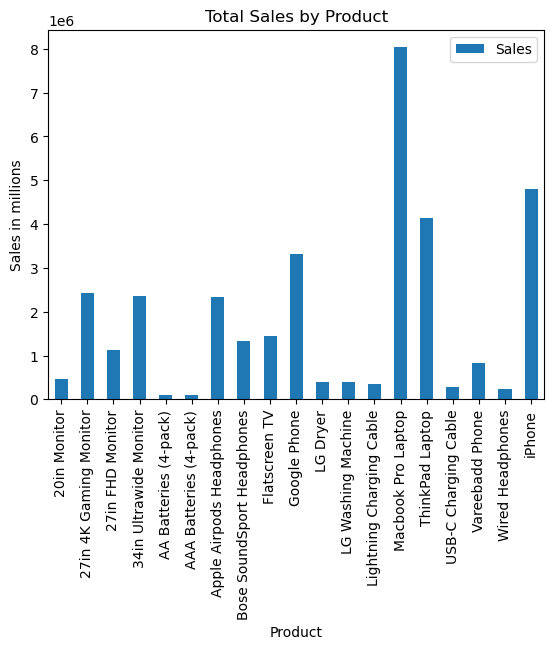

In [70]:
#bar chart of highest sales revenue by product

highest_selling_product = all_data.groupby(['Product'])['Sales'].sum().reset_index()

plt.figure(figsize = (10,6))
highest_selling_product.plot(x = 'Product',kind='bar')
plt.xlabel('Product')
plt.ylabel('Sales in millions')
plt.title('Total Sales by Product')


#### Conclusion

Here we see that MacBook Pro Laptops have the highest sales revenue. We can ask more questions to discover why this happened. We can do further analysis to know what factors resulted in such high sales revenue. We will do more research on the relationship between price and quantity ordered.

#### Relationship between Price and Quantity Ordered

In [25]:
#viewing colmnns

all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [26]:
# counting number of orders by product

count_df = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each':'mean'}).reset_index()

count_df.head()


,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84


/var/folders/ph/hfcn8r8d6xj319fmd8yc4fmr0000gn/T/ipykernel_61588/2493161407.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = 'vertical')


Text(0, 0.5, 'Price')

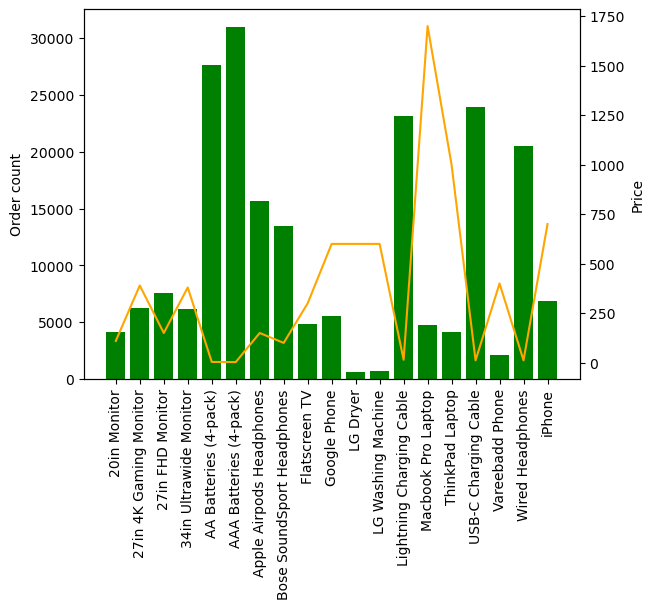

In [33]:
# creating plot to visualise relationship between price and quantity ordered using twin axes

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color = 'g')
ax2.plot(count_df['Product'], count_df['Price Each'], color ='orange')

product = count_df['Product'].values
ax1.set_xticklabels(product, rotation = 'vertical')
ax1.set_ylabel('Order count')
ax2.set_ylabel('Price')

#### Conclusion

The green bars represent the quantity ordered by customers and the yellow line represents the price of each item. Using this visualisation we can see the relationship between price and quantity sold. We can see that for goods with the lowest prices (ie. AA Batteries and AAA Batteries) had the highest quantity of sales and items with the highest prices had a lower total number of orders made by customers.

#### Trend of the Top 5 Most Sold Products Throughout the Year

In [35]:
# counting the top 5 most sold products

all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [36]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [39]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]

In [41]:
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [46]:
# creating pivot table for most sold prodcuts grouped by month and product name

pivot = most_sold_product_df.groupby(['Month','Product']).size().unstack()
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

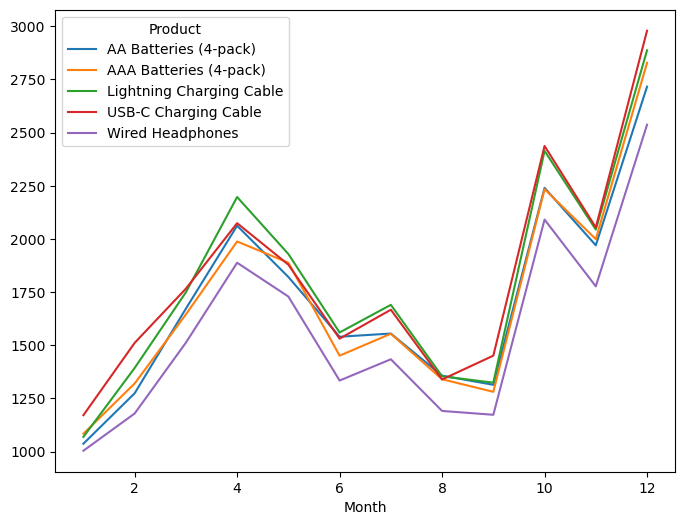

In [48]:
# creating lineplot for top 5 products

pivot.plot(figsize=(8, 6))

#### Conclusion

The line graph above shows us the sales of the top 5 most sold products throughout the year. This insight can be useful for inventory management for the coming year.

### What Products are Most Sold Together?

In [51]:
# filtering for duplicate Order ID to find products ordered at the same time

df_duplicate = all_data[all_data['Order ID'].duplicated(keep=False)]
df_duplicate

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [57]:
# creating a column for products ordered simultaneously named 'grouped_products'

dup_products = df_duplicate.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(
    columns = {'Product': 'grouped_products'})

In [60]:
dup_products_df = df_duplicate.merge(dup_products, how='left', on='Order ID')

In [61]:
dup_products_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"


In [62]:
# after grouping, duplicate order ID's are removed

no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

In [63]:
no_dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"


<Axes: ylabel='count'>

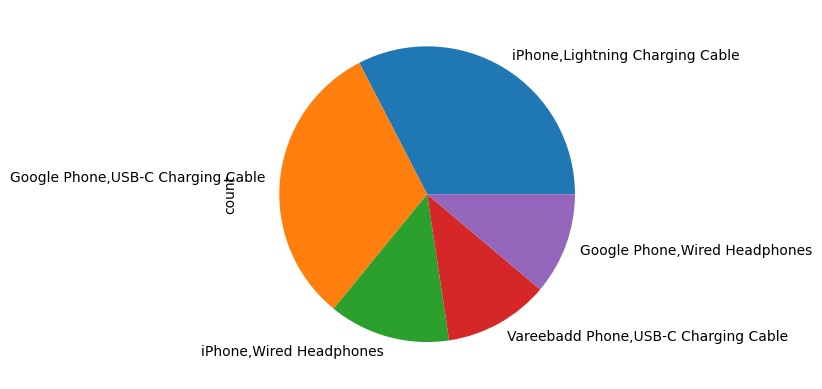

In [65]:
# pie chart for top 5 products sold simultaneously

no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

#### Conclusion

The pie chart above gives a valuable visualisation of which items were most sold together. We can use this insight to manage sales promotions.

## Thank you for reaching the end of my project!